# Turbulent Flow in Pipes 

### Introduction 

Turbulent flow is a flow regime characterized by chaotic property changes. This includes rapid variation of pressure and flow velocity in space and time.  In contrast to laminar flow the fluid no longer travels in layers and mixing across the tube is highly efficient.  

Turbulent regime is characterized by large values of the Reynolds number:

$$
Re = \frac{V R}{\nu}
$$

where $V$ is the characteristic flow velocity, $R$ is the radius of the cross-section of the pipe and $\nu$ is the kinematic viscosity of the fluid. 

Flows at Reynolds numbers larger than 4000 are typically (but not necessarily) turbulent, while those at low Reynolds numbers below 2300 usually remain laminar. Flow in the range of Reynolds numbers 2300 to 4000 and known as transition.


![fig1](/work/Files_for_Flow/Figures/velocity-profiles-internal-flow.png)
The velocity profile in turbulent flow is flatter in the central part of the pipe (i.e., in the turbulent core) than in laminar flow. The flow velocity drops rapidly, extremely close to the walls. This is due to the diffusivity of the turbulent flow.

 

In the case of turbulent pipe flow, there are many empirical formulas describing the average velocity profiles. The simplest and the best known is the power-law velocity profile:

$$
u(r) = U_{max}\left(1-\frac{r}{R}\right)^{\frac{1}{n}}
$$
![fig2](/work/Files_for_Flow/Figures/Turbulent-flow-profiles.png)

In the picture above, the velocity profile is plotted for half the pipe along the pipe radius $r$. $r/R = 0 $ is the pipe's centerline, where the velocity is max, while $r/R = 1$ is the pipe's wall, where the velocity is zero. 

Different values of the exponent $n$ give different profiles. $n$ is known to be a function the Reynolds number as shown in the figure below.

![fig3](/work/Files_for_Flow/Figures/Power-law-velocity-profile.png)

### Assignment 

Experimental measures for turbulent flow in pipes at different Reynolds numbers are given in datasets : 

/work/Files_for_Flow/Data

As an example, we can plot the data for Re = 9906

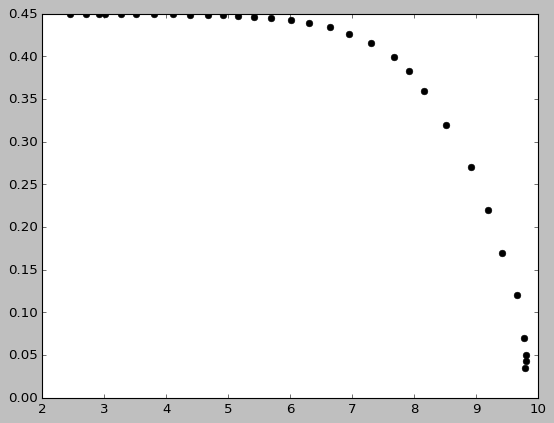

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
data = np.array([[0.000378,   2.45238,   0.95184],
[0.000421,   2.70680,   0.99761], 
[0.000460,   2.91276,   1.02216],
[0.000486,   3.00465,   1.02931],
[0.000541,   3.26391,   1.05618],
[0.000621,  3.51162,   1.04759],
[0.000731,   3.80203,   1.03553],
[0.000888,   4.10240,   1.01105],
[0.001122,   4.38442,   0.97046],
[0.001482,   4.66856,   0.93096],
[0.001989,   4.91975,   0.89043],
[0.002703,   5.14933,   0.85510],
[0.003806,   5.42007,   0.84061],
[0.005433,   5.68277,   0.84178],
[0.007767,   6.01579,   0.83292],
[0.011190,   6.29724,   0.82661],
[0.016234,   6.63310,   0.81964],
[0.023643,   6.94797,   0.80311],
[0.034477,   7.30248,   0.77732],
[0.050361,   7.66457,   0.74306],
[0.067822,   7.90873,   0.70903],
[0.090331,   8.15701,   0.66788],
[0.130100,   8.51893,   0.61211],
[0.180116,   8.90983,   0.54936],
[0.230285,   9.18945,   0.50373],
[0.280546,   9.41695,   0.44079],
[0.330324,   9.65000,   0.39331],
[0.380199,   9.76512,   0.34333],
[0.400404,   9.80688,   0.32658],
[0.407394,   9.80589,   0.33046],
[0.415312,   9.78627,   0.32112]])

fig, ax = plt.subplots()
ax.plot(data[:,1],0.45-data[:,0],'ok')
plt.show()


Your main goal will be to use the data for $Re=5000, 10000, 20000, 40000$ to find a regression curve for the exponent $n =  n(Re)$ and $U_{max} = U_{max}(Re)$.

You will validate your model against the experimental data for $Re = 35061$

### Step by step procedure : 

- Step 1 : Data parsing. The first step involves importing the required information from the data files (.txt). In practice, we need to extract the numeric data from the first (Y) and second (U) columns for the regression problem. This can be done in  three different ways : 1. Copy and paste the data into your python code (as shown in the previous code block) -this solution is not recommended for large datasets-. 2. Remove the header from each file, leaving only numeric data in it, then import the data as a NumPy array as shown in Lab1-Pt2 (Exercise 6) - this solution is ok for large datasets but it is always a bad idea to manually modify data files, because you could accidentally end up modifying the data-. 3. Write a function to parse each file (since they all share the same data format) automatically. This last solution requires some advanced programming. Check this interesting article about file parsing in python. In each file you also need to read the Reynolds number Re_tau  and the radius of the pipe R (which is constant though R= 0.45). 

- Step 2 : Preprocessing. The data contained in the data files are written in terms of y and not r. by inspecting your data you can see that the velocity is max at y close to R=0.45 and almost zero where y is close to 0. Therefore we need to apply a transformation to the original formula to find u(y) by substituting  y = R-r into the equation for u(r). With this new formula we should be able to fit (that is, find the best values) for n and Umax using the experimental data from one data set. However...

- Step 3 : Data preprocessing. ...The linear regression techniques that we saw in ALEMO do not apply here, because the formula of the velocity is a power law !!!  By applying a proper mathematical transformation to the data you can make this nonlinear function linear again. Can you think of any mathematical function transforming a power law function to a linear function??? 

- Step 4 : Linear Regression. Once you figure this out, you should be able to apply linear regression to a "transformed problem" to learn the best values for n and U_max . Repeat this procedure for all datasets except the Retau35k dataset. We will use this dataset to perform a leave-one-out validation. Basically we assume that we are "blind" to some of the data, and we seek for n and U_max without using that data. After finding appropriate values for n and U_max we can use them to predict the velocity for the case Re=35K and verify that the predicted velocities agree with the experimental observations. 

- Step 5 : Interpolation. When you repeat the regression procedure for all datasets you should end up with something like this table:

|  $Re_{\tau}$  &nbsp; &nbsp; &nbsp; 	|Estimated   $n$ 	 &nbsp; &nbsp; &nbsp; &nbsp;| Estimated   $U_{max}$ 	|
|:--------:	|:-----------:	|:--------------:	|
|  5522  	|      -      	|        -       	|
|  9906  	|      -      	|        -       	|
|  21337 	|      -      	|        -       	|
|  31793 	|      -      	|        -       	|
|  39855 	|      -      	|        -       	|

-      Use these values to interpolate n and Umax at Reynolds = 35061, and predict the velocity profile for values of y in the file Retau_35k

- Step 6 : Validation. Compare the velocity profile you just found with the experimental data in column U in the file Retau_35k and compute the average error. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2862c49b-4ca6-4b1c-adad-6d8ae1379427' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>